 **Business Insights**

In [1]:
#load the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
df = pd.read_csv('/content/Amazon Sale Report 1.csv')
df

,index,Order ID,Date,Month,Year,Status,Fulfilment,Sales Channel,ship-service-level,Category,...,Sales,Total Revenue,Total Purchase,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,fulfilled
0,0,405-8078784-5731545,04-30-22,January,1900,Cancelled,Merchant,Amazon.in,Standard,T-shirt,...,584052.83,0,Medium,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,Easy Ship
1,1,171-9198151-1101146,04-30-22,January,1900,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,...,584618.21,406,Low,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,Easy Ship
2,2,404-0687676-7273146,04-30-22,January,1900,Shipped,Amazon,Amazon.in,Expedited,Shirt,...,585134.21,329,Low,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,Easy Ship
3,3,403-9615377-8133951,04-30-22,January,1900,Cancelled,Merchant,Amazon.in,Standard,Blazzer,...,585204.21,0,Medium,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,Easy Ship
4,4,407-1069790-7240320,04-30-22,January,1900,Shipped,Amazon,Amazon.in,Expedited,Trousers,...,584943.88,574,Medium,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16817,16816,404-7821698-0573944,04-20-22,January,1946,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,...,592136.86,1186,High,RANCHI,JHARKHAND,834001.0,IN,False,Easy Ship,Easy Ship
16818,16817,407-9003698-6997908,04-20-22,January,1946,Shipped,Amazon,Amazon.in,Expedited,T-shirt,...,591646.86,626,Medium,SEHORE,MADHYA PRADESH,466001.0,IN,False,NaN,Easy Ship
16819,16818,407-1454437-3606763,04-20-22,January,1946,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,...,591779.86,654,Medium,SEHORE,MADHYA PRADESH,466001.0,IN,False,Easy Ship,Easy Ship
16820,16819,404-9146395-6037150,04-20-22,January,1946,Shipped,Amazon,Amazon.in,Expedited,Shirt,...,591488.86,459,Low,MUMBAI,MAHARASHTRA,400051.0,IN,False,NaN,Easy Ship


In [3]:
# Data Overview
df.head()

,index,Order ID,Date,Month,Year,Status,Fulfilment,Sales Channel,ship-service-level,Category,...,Sales,Total Revenue,Total Purchase,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,fulfilled
0,0,405-8078784-5731545,04-30-22,January,1900,Cancelled,Merchant,Amazon.in,Standard,T-shirt,...,584052.83,0,Medium,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,Easy Ship
1,1,171-9198151-1101146,04-30-22,January,1900,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,...,584618.21,406,Low,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,Easy Ship
2,2,404-0687676-7273146,04-30-22,January,1900,Shipped,Amazon,Amazon.in,Expedited,Shirt,...,585134.21,329,Low,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,Easy Ship
3,3,403-9615377-8133951,04-30-22,January,1900,Cancelled,Merchant,Amazon.in,Standard,Blazzer,...,585204.21,0,Medium,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,Easy Ship
4,4,407-1069790-7240320,04-30-22,January,1900,Shipped,Amazon,Amazon.in,Expedited,Trousers,...,584943.88,574,Medium,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,Easy Ship


In [4]:
df.tail()

,index,Order ID,Date,Month,Year,Status,Fulfilment,Sales Channel,ship-service-level,Category,...,Sales,Total Revenue,Total Purchase,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,fulfilled
16817,16816,404-7821698-0573944,04-20-22,January,1946,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,...,592136.86,1186,High,RANCHI,JHARKHAND,834001.0,IN,False,Easy Ship,Easy Ship
16818,16817,407-9003698-6997908,04-20-22,January,1946,Shipped,Amazon,Amazon.in,Expedited,T-shirt,...,591646.86,626,Medium,SEHORE,MADHYA PRADESH,466001.0,IN,False,NaN,Easy Ship
16819,16818,407-1454437-3606763,04-20-22,January,1946,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,...,591779.86,654,Medium,SEHORE,MADHYA PRADESH,466001.0,IN,False,Easy Ship,Easy Ship
16820,16819,404-9146395-6037150,04-20-22,January,1946,Shipped,Amazon,Amazon.in,Expedited,Shirt,...,591488.86,459,Low,MUMBAI,MAHARASHTRA,400051.0,IN,False,NaN,Easy Ship
16821,16820,405-0909852-2241165,04-20-22,January,1946,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,...,591371.86,825,Medium,TIRUPPUR,TAMIL NADU,641652.0,I,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16822 entries, 0 to 16821
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16822 non-null  int64  
 1   Order ID            16822 non-null  object 
 2   Date                16822 non-null  object 
 3   Month               16822 non-null  object 
 4   Year                16822 non-null  int64  
 5   Status              16822 non-null  object 
 6   Fulfilment          16822 non-null  object 
 7   Sales Channel       16822 non-null  object 
 8   ship-service-level  16822 non-null  object 
 9   Category            16822 non-null  object 
 10  Size                16822 non-null  object 
 11  Courier Status      16822 non-null  object 
 12  Qty                 16822 non-null  int64  
 13  currency            15802 non-null  object 
 14  Amount              15802 non-null  float64
 15  Sales               16822 non-null  float64
 16  Tota

In [6]:
# Data Cleaning (Example: Handling missing values)
df.fillna({'Amount': 0, 'Qty': 0}, inplace=True)

In [7]:
# Identify missing values
missing_values = df.isnull()

# Count missing values per column
missing_counts = df.isnull().sum()

print(missing_values)
print(missing_counts)

       index  Order ID   Date  Month   Year  Status  Fulfilment  \
0      False     False  False  False  False   False       False   
1      False     False  False  False  False   False       False   
2      False     False  False  False  False   False       False   
3      False     False  False  False  False   False       False   
4      False     False  False  False  False   False       False   
...      ...       ...    ...    ...    ...     ...         ...   
16817  False     False  False  False  False   False       False   
16818  False     False  False  False  False   False       False   
16819  False     False  False  False  False   False       False   
16820  False     False  False  False  False   False       False   
16821  False     False  False  False  False   False       False   

       Sales Channel  ship-service-level  Category  ...  Sales  Total Revenue  \
0              False               False     False  ...  False          False   
1              False             

In [8]:
# Use the display() function to show the DataFrame
display(missing_values)
display(missing_counts)

,index,Order ID,Date,Month,Year,Status,Fulfilment,Sales Channel,ship-service-level,Category,...,Sales,Total Revenue,Total Purchase,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,fulfilled
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16817,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16818,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
16819,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16820,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


,0
index,0
Order ID,0
Date,0
Month,0
Year,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0


 **Sales Overview**

In [9]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-9-ad52afec9fb3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [10]:
# Group by date and sum the 'Amount' to get daily sales
daily_sales = df.groupby('Date')['Amount'].sum().reset_index()
display(daily_sales)

,Date,Amount
0,2022-04-20,439189.12
1,2022-04-21,971966.58
2,2022-04-22,978033.62
3,2022-04-23,1093536.62
4,2022-04-24,1082483.95
5,2022-04-25,977764.88
6,2022-04-26,907039.09
7,2022-04-27,853801.58
8,2022-04-28,836128.52
9,2022-04-29,836000.89


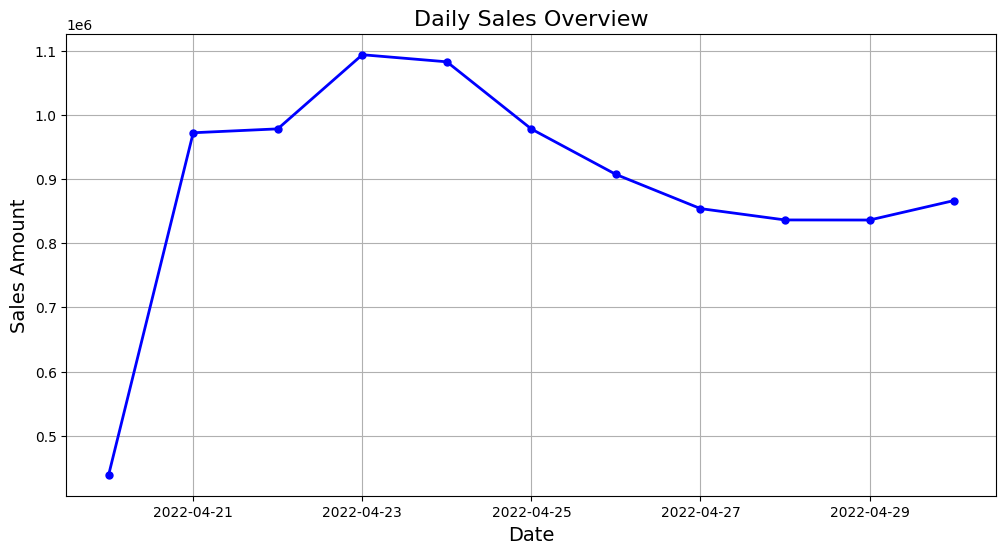

In [11]:
# Plot the sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Amount'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Daily Sales Overview', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.grid(True)
plt.show()

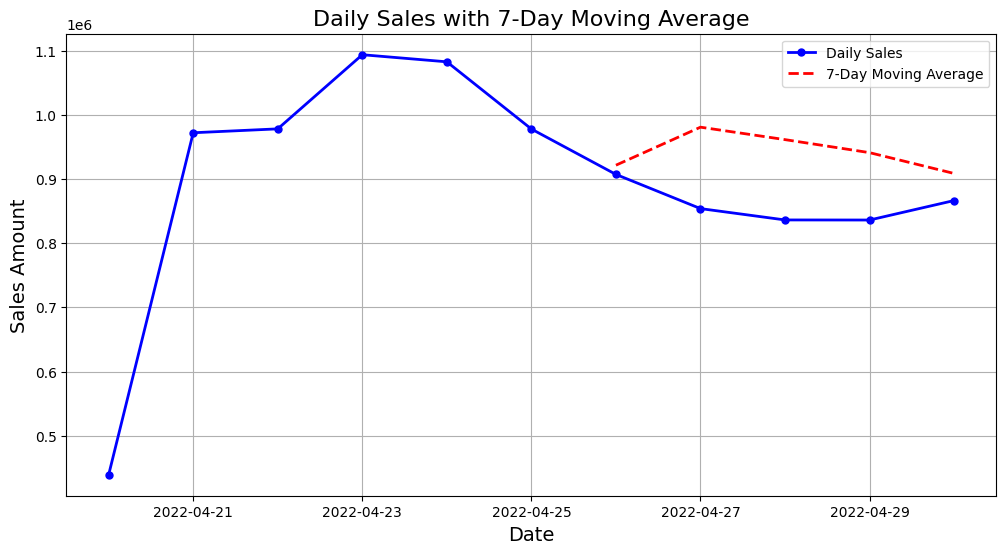

In [12]:
# Moving average to smooth out the trend
daily_sales['Moving_Avg'] = daily_sales['Amount'].rolling(window=7).mean()  # 7-day moving average

# Plot the original sales and the moving average
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Amount'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5, label='Daily Sales')
plt.plot(daily_sales['Date'], daily_sales['Moving_Avg'], color='r', linestyle='--', linewidth=2, label='7-Day Moving Average')
plt.title('Daily Sales with 7-Day Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Aggregate sales data by month
monthly_sales = df.resample('M', on='Date')['Amount'].sum().reset_index()

<ipython-input-13-eecdde866914>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Amount'].sum().reset_index()


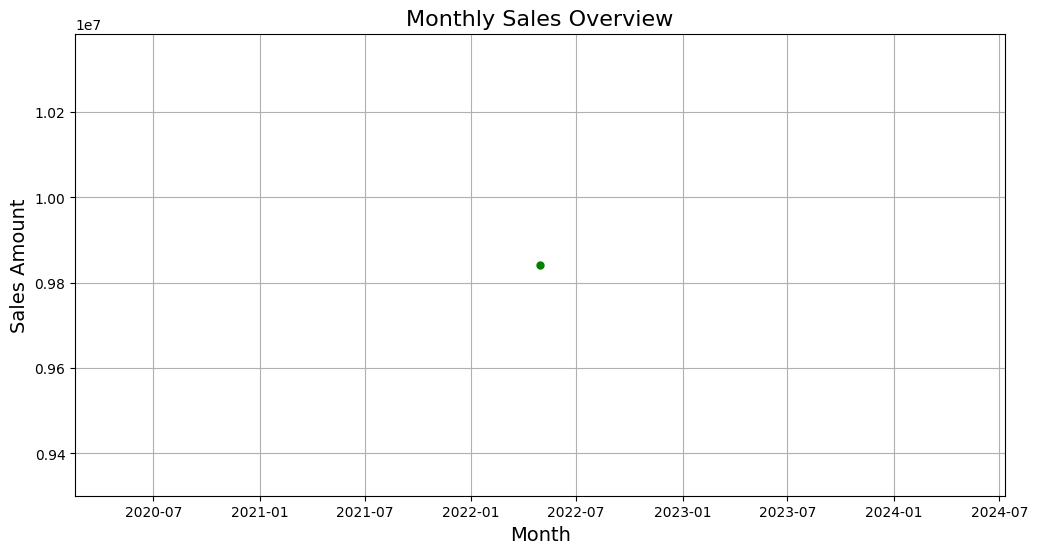

In [14]:
# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Amount'], marker='o', color='g', linestyle='-', linewidth=2, markersize=5)
plt.title('Monthly Sales Overview', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.grid(True)
plt.show()

In [15]:
# Aggregate sales data by week
weekly_sales = df.resample('W', on='Date')['Amount'].sum().reset_index()

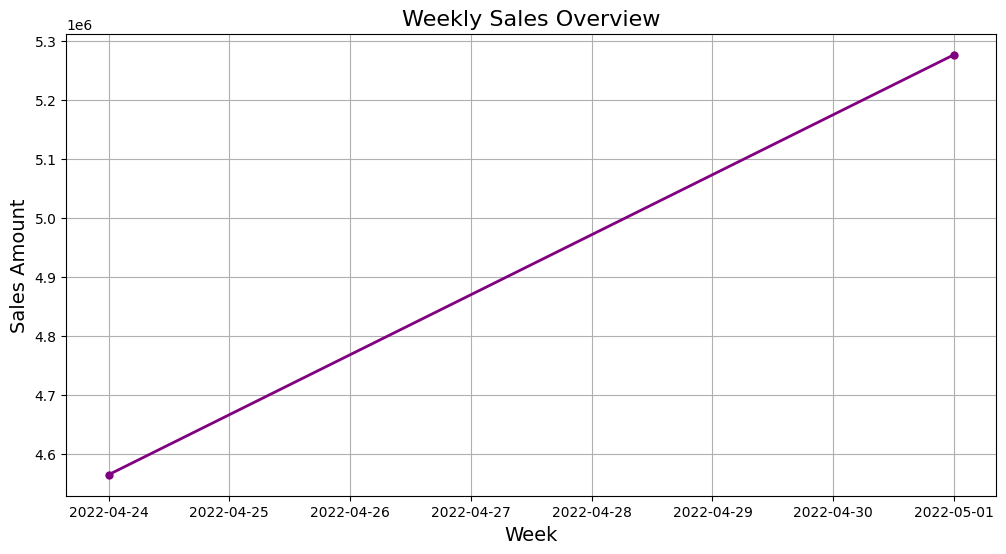

In [16]:
# Plot the weekly sales trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Date'], weekly_sales['Amount'], marker='o', color='purple', linestyle='-', linewidth=2, markersize=5)
plt.title('Weekly Sales Overview', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.grid(True)
plt.show()

In [17]:
# Accesses the 'Date' column of the DataFrame
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [18]:
total_sales = df['Amount'].sum()
print(f'Total Sales Amount: {total_sales}')

Total Sales Amount: 9842323.92


In [19]:
sales_over_time = df.groupby(['year', 'month'])['Amount'].sum().reset_index()
display(sales_over_time)

,year,month,Amount
0,2022,4,9842323.92


 **Product Analysis**

In [20]:
# Count the number of orders per category
category_distribution_df = df['Category'].value_counts().reset_index()

In [21]:
# Rename the columns for clarity
category_distribution_df.columns = ['Category', 'Number of Orders']
# Display the top 5 product categories
display(category_distribution_df)

,Category,Number of Orders
0,T-shirt,6913
1,Shirt,6793
2,Blazzer,1428
3,Trousers,1331
4,Wallet,136
5,Perfume,102
6,Socks,83
7,Shoes,36


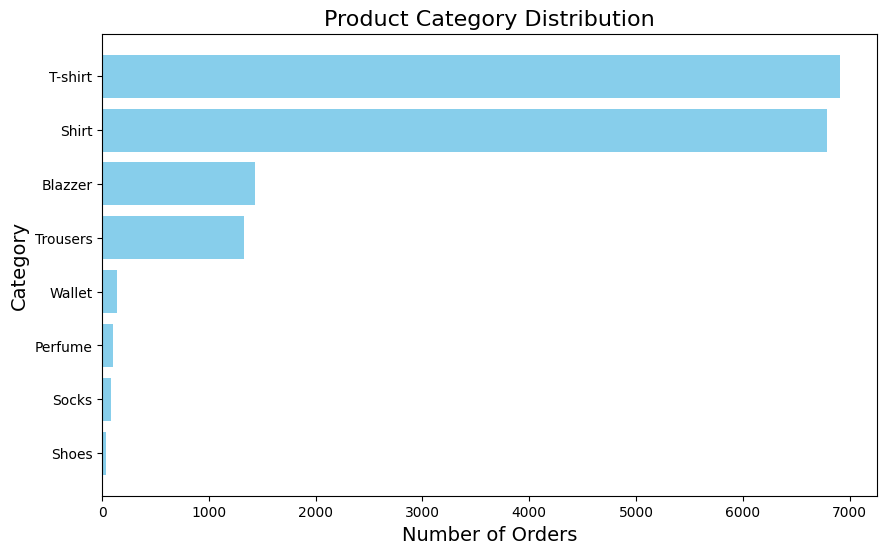

In [22]:
# Plot the distribution of product categories
plt.figure(figsize=(10, 6))
plt.barh(category_distribution_df['Category'], category_distribution_df['Number of Orders'], color='skyblue')
plt.title('Product Category Distribution', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the category with the highest orders at the top
plt.show()

In [23]:
# Count the number of orders by product size
size_distribution = df['Size'].value_counts().reset_index()

In [24]:
# Rename the columns for clarity
size_distribution.columns = ['Size', 'Number of Orders']
display(size_distribution)

,Size,Number of Orders
0,M,2987
1,XL,2805
2,L,2750
3,XXL,2303
4,S,2241
5,3XL,1926
6,XS,1501
7,Free,274
8,6XL,16
9,5XL,16


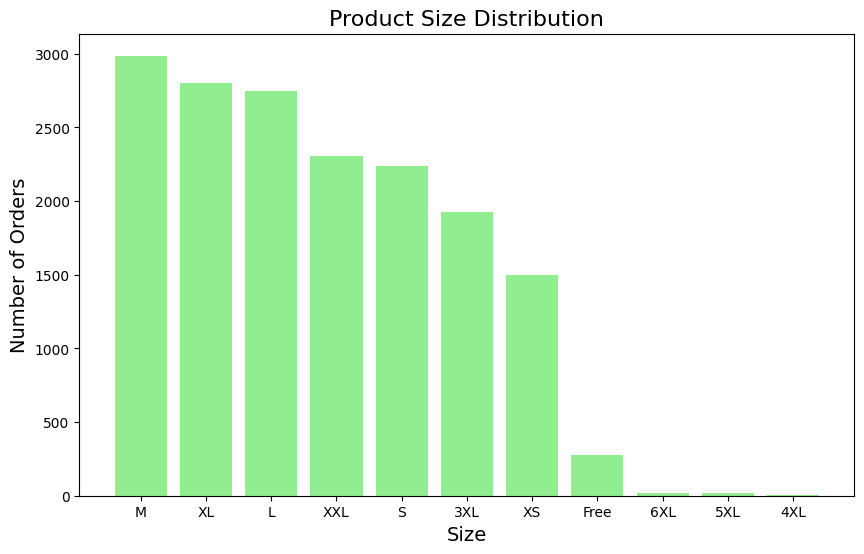

In [25]:
# Plot the distribution of product sizes
plt.figure(figsize=(10, 6))
plt.bar(size_distribution['Size'], size_distribution['Number of Orders'], color='lightgreen')
plt.title('Product Size Distribution', fontsize=16)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.show()

In [46]:
# Aggregate the quantity sold by category
quantity_by_category = df.groupby('Category')['Qty'].sum().reset_index()

In [27]:
# Sort by quantity sold in descending order
quantity_by_category = quantity_by_category.sort_values(by='Qty', ascending=False)

# Display the top 5 categories by quantity sold
display(quantity_by_category)

,Category,Qty
5,T-shirt,6204
2,Shirt,6055
0,Blazzer,1292
6,Trousers,1245
7,Wallet,141
1,Perfume,95
4,Socks,74
3,Shoes,33


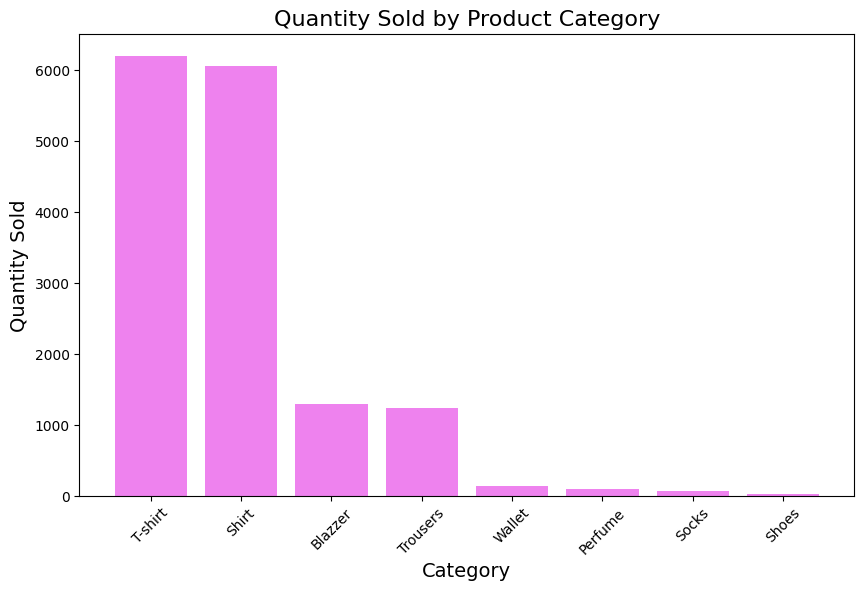

In [28]:
# Plot the quantity sold by product category
plt.figure(figsize=(10, 6))
plt.bar(quantity_by_category['Category'], quantity_by_category['Qty'], color='violet')
plt.title('Quantity Sold by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [29]:
# Aggregate the quantity sold by category and size
quantity_by_category_size = df.groupby(['Category', 'Size'])['Qty'].sum().unstack().fillna(0)

# Display the first few rows of the pivot table
display(quantity_by_category_size)

Size,3XL,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
Category,,,,,,,,,,,
Blazzer,163.0,0.0,0.0,0.0,0.0,224.0,227.0,204.0,199.0,111.0,164.0
Perfume,0.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0
Shirt,771.0,3.0,15.0,13.0,0.0,1048.0,1011.0,664.0,1137.0,424.0,969.0
Shoes,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0
Socks,10.0,0.0,0.0,0.0,0.0,14.0,11.0,13.0,8.0,8.0,10.0
T-shirt,692.0,0.0,0.0,0.0,0.0,979.0,1211.0,981.0,917.0,678.0,746.0
Trousers,125.0,0.0,0.0,0.0,0.0,214.0,231.0,152.0,243.0,93.0,187.0
Wallet,0.0,0.0,0.0,0.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0


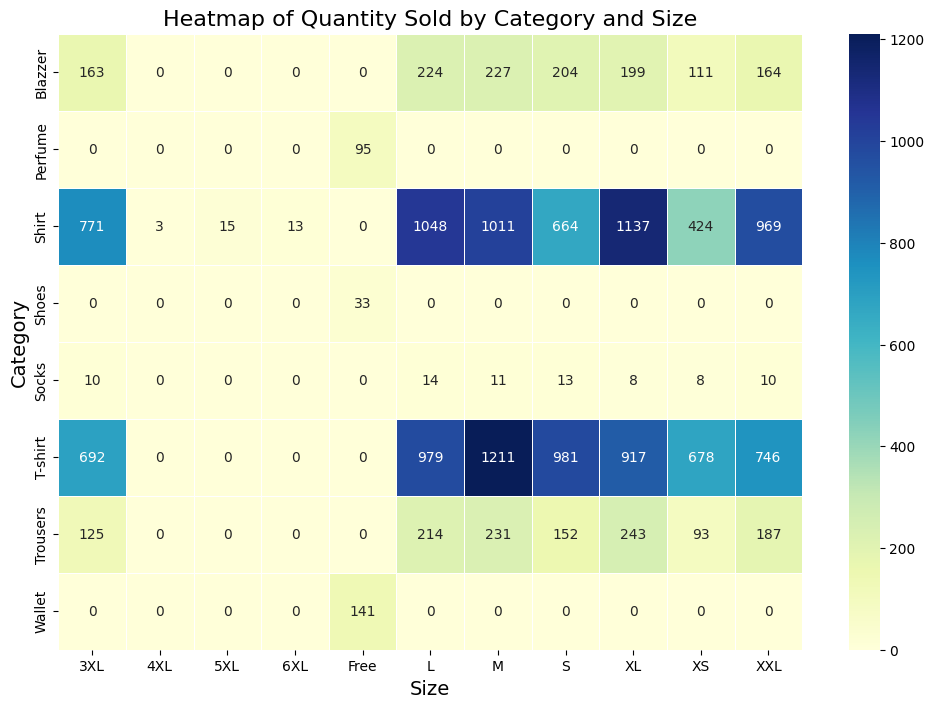

In [30]:
# Plot the heatmap for quantity sold by category and size
plt.figure(figsize=(12, 8))
sns.heatmap(quantity_by_category_size, annot=True, fmt="g", cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Quantity Sold by Category and Size', fontsize=16)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

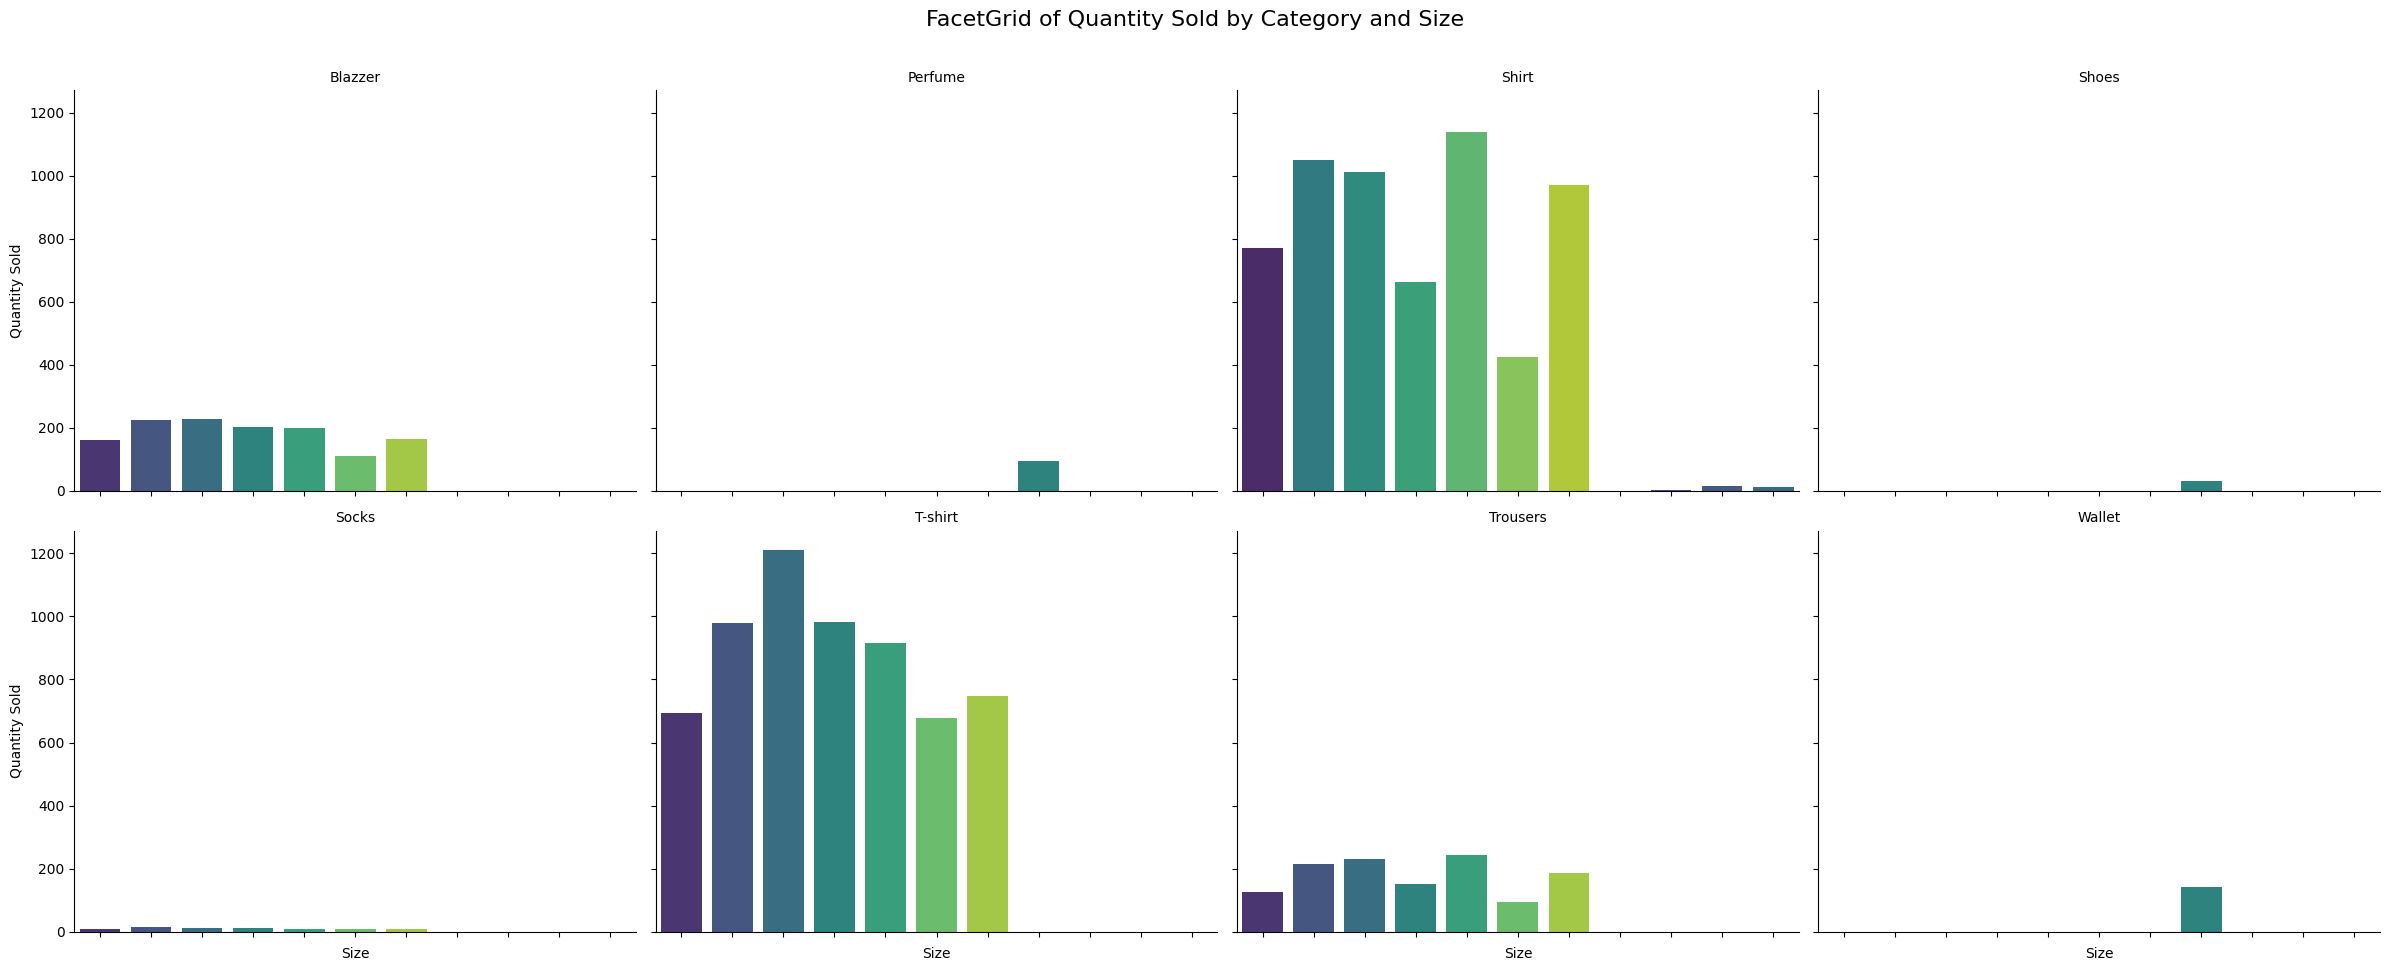

In [31]:
# Convert the data into a format suitable for FacetGrid
quantity_by_category_size = df.groupby(['Category', 'Size'])['Qty'].sum().reset_index()

# Create a FacetGrid
g = sns.FacetGrid(quantity_by_category_size, col='Category', col_wrap=4, height=5, aspect=1.2)
g.map(sns.barplot, 'Size', 'Qty', palette='viridis')

# Adjust the titles and labels
g.set_titles("{col_name}")
g.set_axis_labels('Size', 'Quantity Sold')
g.set_xticklabels(rotation=45)
g.fig.suptitle('FacetGrid of Quantity Sold by Category and Size', fontsize=16)
g.fig.subplots_adjust(top=0.9)  # Adjust the top space to fit the title
plt.show()

 **Fulfillment Analysis**

In [32]:
# Count the number of orders by fulfillment method
fulfillment_distribution = df['Fulfilment'].value_counts().reset_index()

# Rename the columns for clarity
fulfillment_distribution.columns = ['Fulfilment Method', 'Number of Orders']

# Display the distribution of fulfillment methods
display(fulfillment_distribution)

,Fulfilment Method,Number of Orders
0,Amazon,10762
1,Merchant,6060


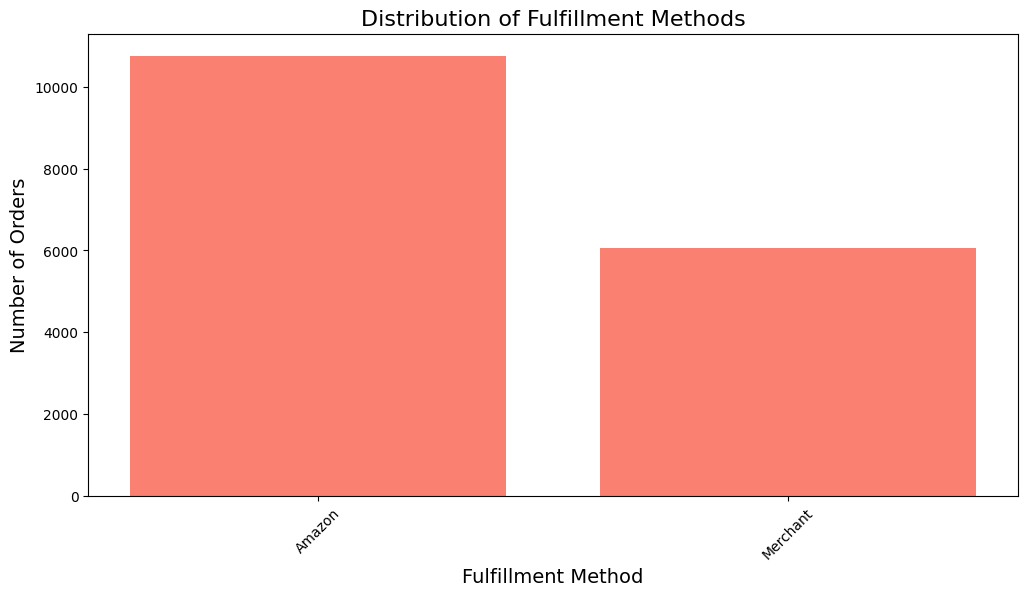

In [33]:
# Plot the distribution of fulfillment methods
plt.figure(figsize=(12, 6))
plt.bar(fulfillment_distribution['Fulfilment Method'], fulfillment_distribution['Number of Orders'], color='salmon')
plt.title('Distribution of Fulfillment Methods', fontsize=16)
plt.xlabel('Fulfillment Method', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [34]:
# Create a pivot table to analyze fulfillment effectiveness
effectiveness_analysis = df.pivot_table(index='Fulfilment', columns='Status', values='Order ID', aggfunc='count', fill_value=0)

# Display the pivot table
display(effectiveness_analysis)

Status,Cancelled,Shipped,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller
Fulfilment,,,,,,,,
Amazon,1365,9397,0,0,0,0,0,0
Merchant,1036,0,4666,2,1,2,352,1


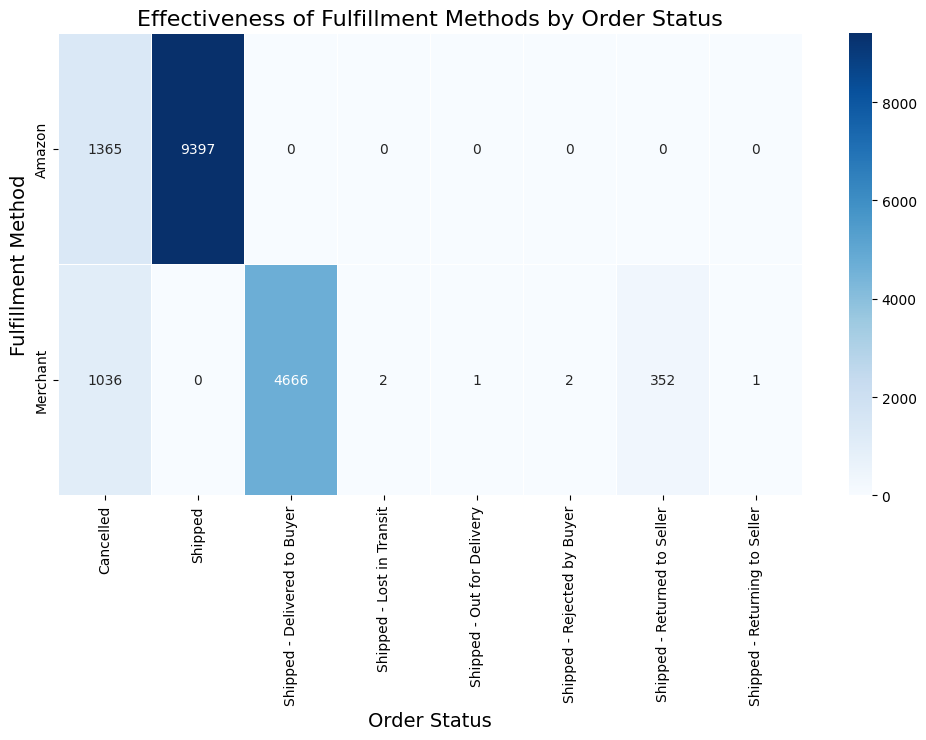

In [35]:
# Plot the effectiveness of fulfillment methods
plt.figure(figsize=(12, 6))
sns.heatmap(effectiveness_analysis, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Effectiveness of Fulfillment Methods by Order Status', fontsize=16)
plt.xlabel('Order Status', fontsize=14)
plt.ylabel('Fulfillment Method', fontsize=14)
plt.show()

In [36]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check if 'Delivery Date' or an equivalent column exists
if 'Delivery Date' in df.columns:
    df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])
    df['Delivery Time'] = (df['Delivery Date'] - df['Date']).dt.days

    # Calculate average delivery time by fulfillment method
    average_delivery_time = df.groupby('Fulfilment')['Delivery Time'].mean().reset_index()

    # Display the average delivery time
    print(average_delivery_time)
else:
    # If 'Delivery Date' does not exist, analyze other aspects
    fulfillment_distribution = df['Fulfilment'].value_counts().reset_index()
    fulfillment_distribution.columns = ['Fulfilment Method', 'Number of Orders']

    # Display the distribution of fulfillment methods
    display(fulfillment_distribution)

,Fulfilment Method,Number of Orders
0,Amazon,10762
1,Merchant,6060


<ipython-input-37-316a8cf39890>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fulfilment', y='Amount', data=df, palette='Set2')


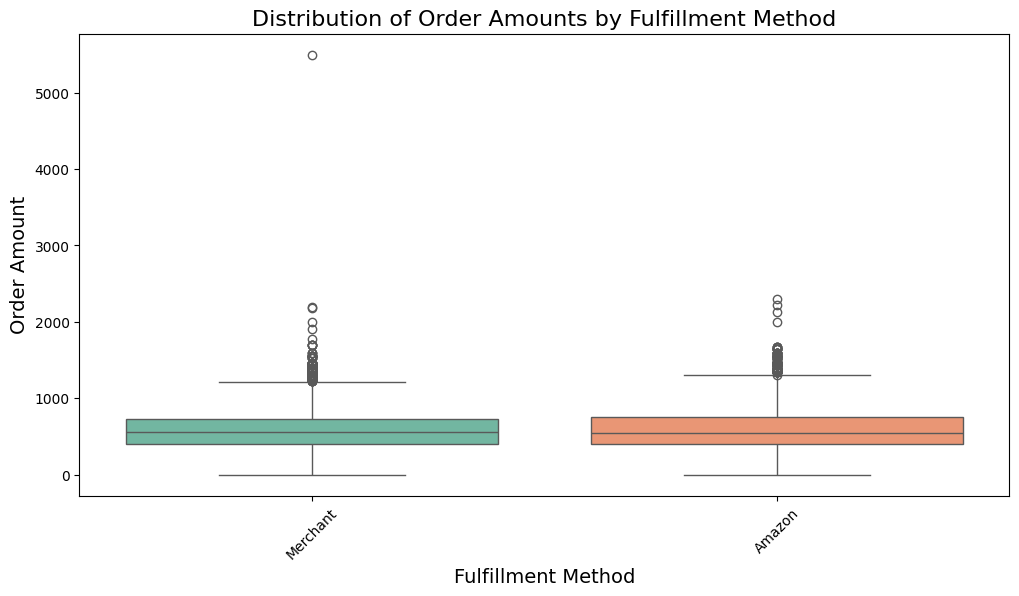

In [37]:
# Plot the distribution of fulfillment methods
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fulfilment', y='Amount', data=df, palette='Set2')
plt.title('Distribution of Order Amounts by Fulfillment Method', fontsize=16)
plt.xlabel('Fulfillment Method', fontsize=14)
plt.ylabel('Order Amount', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Customer Segmentation**

In [38]:
# Convert necessary columns to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Feature engineering
# Check if 'customer_id' exists, if not, handle accordingly (e.g., create a dummy customer ID)
if 'customer_id' not in df.columns:
    df['customer_id'] = 'default_customer'  # Replace with a suitable default or logic to generate customer IDs

df['Total_Spent'] = df.groupby('customer_id')['Amount'].transform('sum')
df['Order_Count'] = df.groupby('customer_id')['Order ID'].transform('count')
# Example location-based feature: Create a 'Region' based on 'ship-state'
df['Region'] = df['ship-state'].apply(lambda x: 'Region_A' if x in ['State1', 'State2'] else 'Region_B')


In [39]:
# Prepare data for clustering
features = df[['Total_Spent', 'Order_Count']]
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [40]:
# Apply K-Means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [41]:
# Analyze the segments
cluster_summary = df.groupby('Cluster').agg({
    'Total_Spent': 'mean',
    'Order_Count': 'mean'
}).reset_index()

display(cluster_summary)

region_cluster_summary = df.groupby(['Region', 'Cluster']).agg({
    'Total_Spent': 'mean',
    'Order_Count': 'mean'
}).reset_index()

display(region_cluster_summary)

,Cluster,Total_Spent,Order_Count
0,0,9842323.92,16822.0


,Region,Cluster,Total_Spent,Order_Count
0,Region_B,0,9842323.92,16822.0


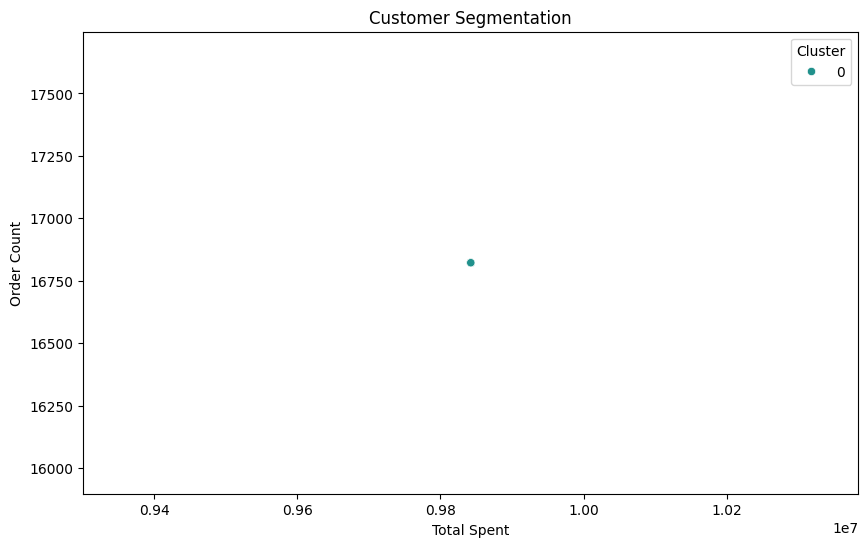

In [42]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Spent', y='Order_Count', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Spent')
plt.ylabel('Order Count')
plt.legend(title='Cluster')
plt.show()

**Geographical Analysis**

In [43]:
# Convert 'Amount' to numeric if it's not already
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [44]:
# Aggregate sales by state
sales_by_state = df.groupby('ship-state')['Amount'].sum().reset_index().rename(columns={'ship-state': 'state'})

# Aggregate sales by city
sales_by_city = df.groupby('ship-city')['Amount'].sum().reset_index().rename(columns={'ship-city': 'city'})

In [ ]:
# Load geographical data for states
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load shapefile or GeoJSON for cities if available
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
# Merge sales data with geographical data for states
#world = world.rename(columns={'name': 'state'})  # Ensure column names match
#world = world.merge(sales_by_state, on='state', how='left')

# If you have geographical data for cities
cities = cities.rename(columns={'name': 'city'})
cities = cities.merge(sales_by_city, on='city', how='left')

<Figure size 1200x600 with 0 Axes>

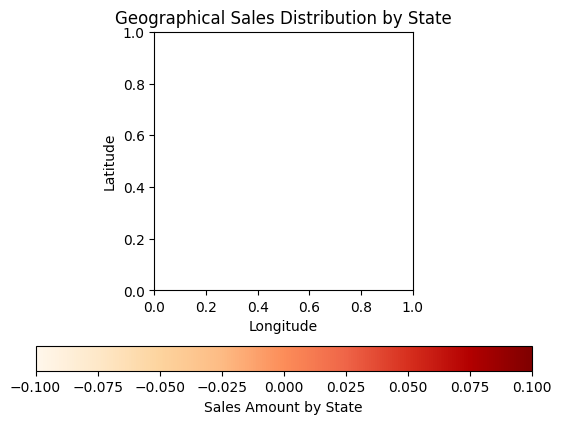

In [ ]:
# Plot geographical sales distribution by state
#plt.figure(figsize=(12, 6))
#world.plot(column='Amount', cmap='OrRd', legend=True,
#           legend_kwds={'label': "Sales Amount by State",
#                       'orientation': "horizontal"})
plt.title('Geographical Sales Distribution by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Figure size 1200x600 with 0 Axes>

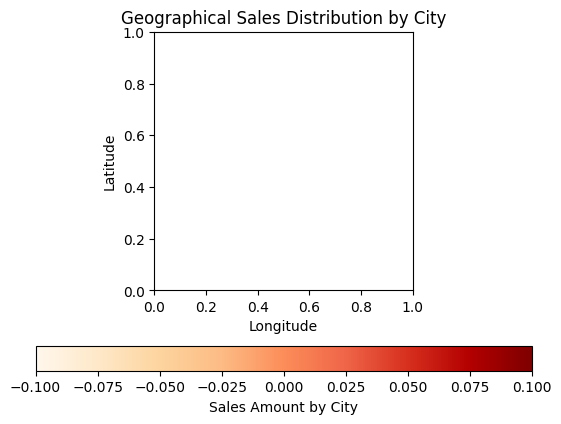

In [ ]:
# Plot geographical sales distribution by city if cities data is available
plt.figure(figsize=(12, 6))
cities.plot(column='Amount', cmap='OrRd', legend=True,
            legend_kwds={'label': "Sales Amount by City",
                         'orientation': "horizontal"})
plt.title('Geographical Sales Distribution by City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()